# Notebook 02: Malaysia Exploratory Analysis

Comprehensive EDA for Malaysia Housing Dataset (2025).\
Focus: Understanding township-level aggregates and regional patterns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [4]:
malaysia_data = pd.read_csv('data/malaysia/malaysia_house_price_data_2025.csv')
print("Malaysia Dataset Overview:")
print(f"Shape: {malaysia_data.shape}")
print(f"Columns: {malaysia_data.columns.tolist()}")

Malaysia Dataset Overview:
Shape: (2000, 8)
Columns: ['Township', 'Area', 'State', 'Tenure', 'Type', 'Median_Price', 'Median_PSF', 'Transactions']


## Dataset Info

In [5]:
print("Data Types:")
print(malaysia_data.dtypes)
print(f"\nNumerical features: {malaysia_data.select_dtypes(include=[np.number]).shape}")
print(f"Categorical features: {malaysia_data.select_dtypes(include=['object']).shape}")
print(f"\nDuplicate rows: {malaysia_data.duplicated().sum()}")
print(f"Unique townships: {malaysia_data['Township'].nunique() if 'Township' in malaysia_data.columns else 'N/A'}")

Data Types:
Township         object
Area             object
State            object
Tenure           object
Type             object
Median_Price    float64
Median_PSF      float64
Transactions      int64
dtype: object

Numerical features: (2000, 3)
Categorical features: (2000, 5)

Duplicate rows: 0
Unique townships: 1946


## Target Variable Analysis

count    2.000000e+03
mean     4.906854e+05
std      4.686322e+05
min      2.704900e+04
25%      2.699500e+05
50%      3.900000e+05
75%      5.735000e+05
max      1.142050e+07
Name: Median_Price, dtype: float64


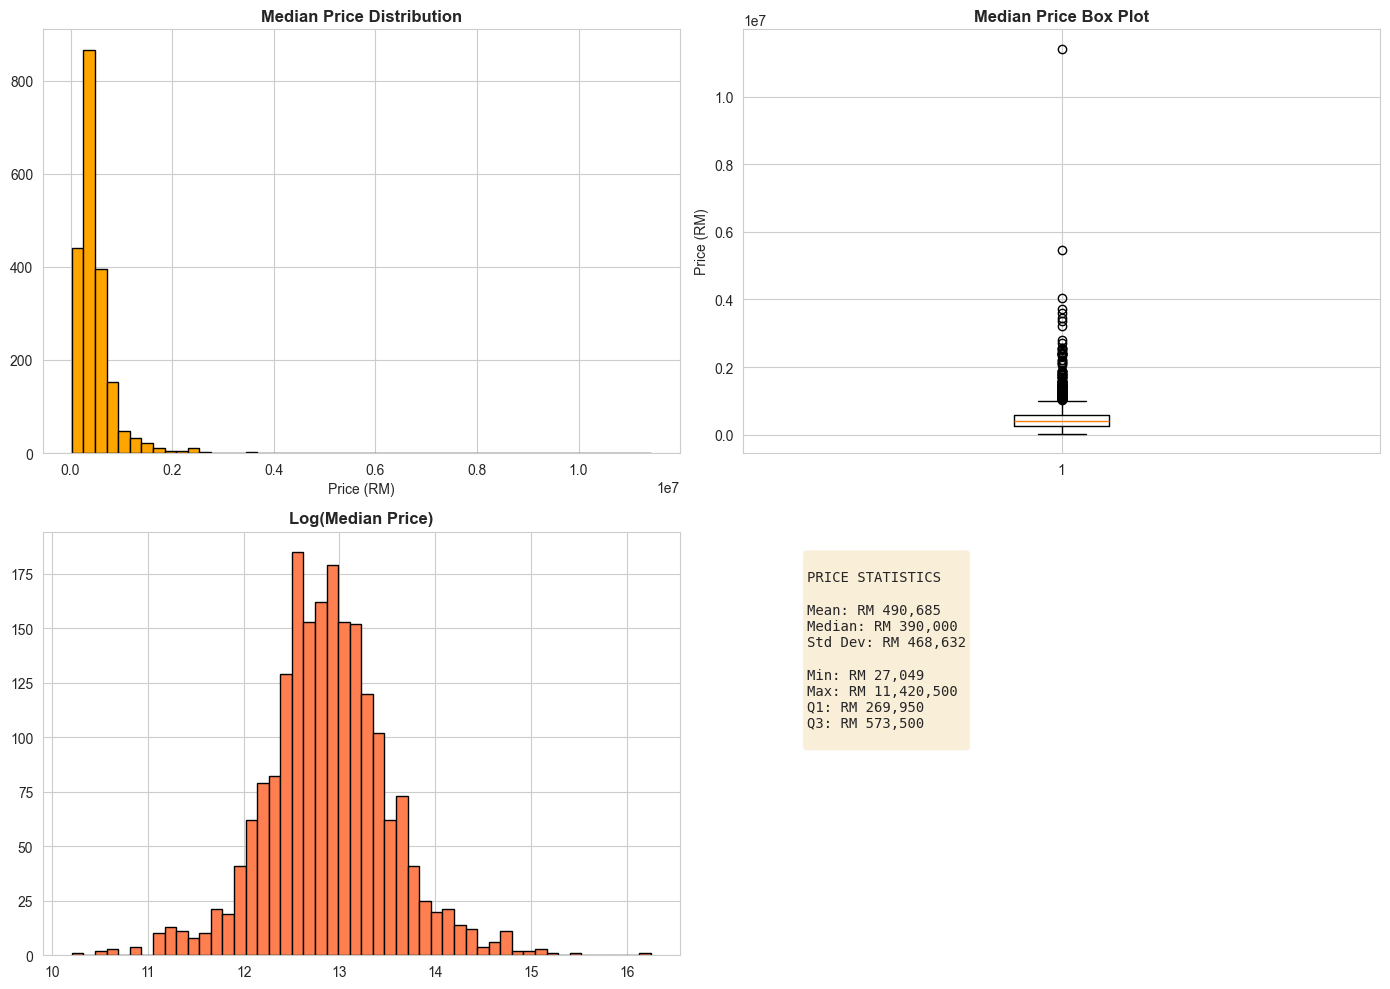

In [16]:
print(malaysia_data['Median_Price'].describe())

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution
axes[0, 0].hist(malaysia_data['Median_Price'].dropna(), bins=50, edgecolor='black', color='orange')
axes[0, 0].set_title('Median Price Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Price (RM)')

# Box plot
axes[0, 1].boxplot(malaysia_data['Median_Price'].dropna())
axes[0, 1].set_title('Median Price Box Plot', fontweight='bold')
axes[0, 1].set_ylabel('Price (RM)')

# Log-transformed
axes[1, 0].hist(np.log1p(malaysia_data['Median_Price'].dropna()), bins=50, edgecolor='black', color='coral')
axes[1, 0].set_title('Log(Median Price)', fontweight='bold')

# Summary stats
axes[1, 1].axis('off')
stats_text = f"""
PRICE STATISTICS

Mean: RM {malaysia_data['Median_Price'].mean():,.0f}
Median: RM {malaysia_data['Median_Price'].median():,.0f}
Std Dev: RM {malaysia_data['Median_Price'].std():,.0f}

Min: RM {malaysia_data['Median_Price'].min():,.0f}
Max: RM {malaysia_data['Median_Price'].max():,.0f}
Q1: RM {malaysia_data['Median_Price'].quantile(0.25):,.0f}
Q3: RM {malaysia_data['Median_Price'].quantile(0.75):,.0f}
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=10, family='monospace', 
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

Median Price Distribution: histogram shows that the majority of property prices are clustered at the lower end, indicating that affordable housing is far more common than luxury properties.

Log(Median Price): applying a logarithmic scale smooths out the data, creating a more balanced, bell-shaped curve which is better for machine learning predictions.

Median Price Box Plot: the box plot reveals many outliers, confirming that there are a significant number of exceptionally expensive properties compared to the market average.

Price Statistics: the summary table highlights a massive gap between the minimum price (RM 27k) and the maximum (RM 11.4m), showing the extreme diversity of the Malaysian housing market.

## Missing Values Analysis

In [17]:
missing = pd.DataFrame({
    'Column': malaysia_data.columns,
    'Missing_Count': malaysia_data.isnull().sum(),
    'Missing_Percentage': (malaysia_data.isnull().sum() / len(malaysia_data)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("Missing Values Analysis:")
print(missing)

# Visualize
if missing['Missing_Percentage'].sum() > 0:
    plt.figure(figsize=(10, 5))
    plt.bar(missing[missing['Missing_Percentage'] > 0]['Column'], 
            missing[missing['Missing_Percentage'] > 0]['Missing_Percentage'], color='salmon')
    plt.xticks(rotation=45, ha='right')
    plt.title('Missing Values by Column', fontweight='bold')
    plt.ylabel('Missing %')
    plt.tight_layout()
    plt.show()
else:
    print("✓ No missing values detected!")

Missing Values Analysis:
                    Column  Missing_Count  Missing_Percentage
Township          Township              0                 0.0
Area                  Area              0                 0.0
State                State              0                 0.0
Tenure              Tenure              0                 0.0
Type                  Type              0                 0.0
Median_Price  Median_Price              0                 0.0
Median_PSF      Median_PSF              0                 0.0
Transactions  Transactions              0                 0.0
✓ No missing values detected!


## Correlation Analysis

Correlations with Median Price:
Median_Price    1.000000
Median_PSF      0.746647
Transactions    0.009000
Name: Median_Price, dtype: float64


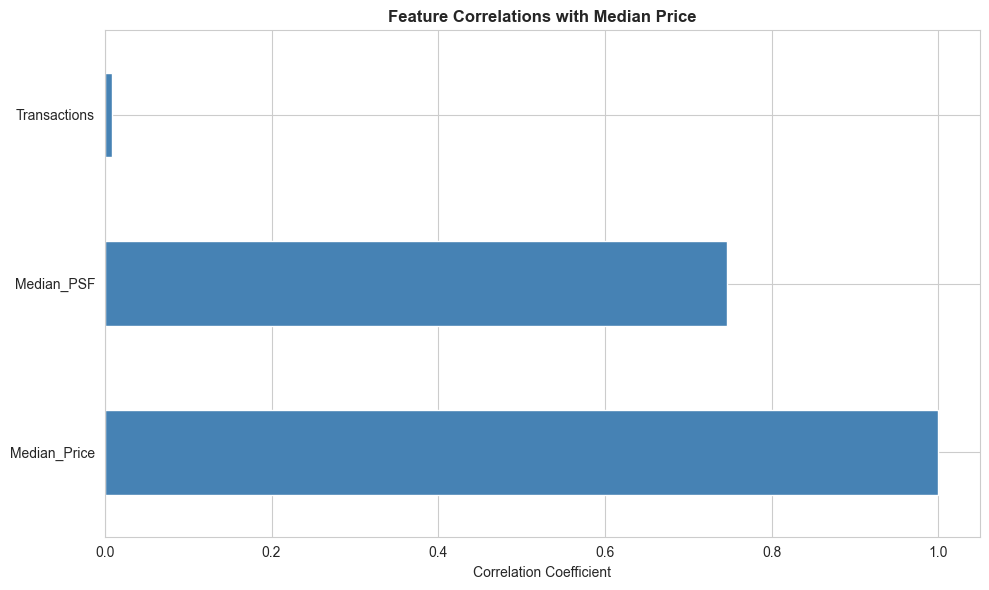

In [18]:
numerical_cols = malaysia_data.select_dtypes(include=[np.number]).columns.tolist()
if 'Median_Price' in numerical_cols:
    correlations = malaysia_data[numerical_cols].corr()['Median_Price'].sort_values(ascending=False)
    print("Correlations with Median Price:")
    print(correlations)
    
    plt.figure(figsize=(10, 6))
    correlations.plot(kind='barh', color='steelblue')
    plt.title('Feature Correlations with Median Price', fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

Chart demonstrates that Median_PSF (Price per Square Foot) has the strongest positive link to house prices, meaning as the price per foot goes up, the total house price almost always follows.

## Regional Analysis

Statistics by State:
                          mean    median           std  count
State                                                        
Kuala Lumpur     853342.085227  502500.0  1.125166e+06    176
Putrajaya        796666.666667  880000.0  5.101307e+05      3
Selangor         594347.607339  475000.0  4.078367e+05    545
Johor            484990.358090  420000.0  2.841011e+05    377
Penang           475844.374332  350000.0  4.145709e+05    187
Perlis           414428.000000  414428.0           NaN      1
Kelantan         379166.666667  342500.0  7.914912e+04      3
Sarawak          373358.925926  350000.0  1.904937e+05     54
Negeri Sembilan  362162.103704  305000.0  1.979653e+05    135
Sabah            329887.500000  297000.0  1.889115e+05     40
Melaka           329528.969388  300000.0  1.236235e+05     98
Perak            328909.932990  300000.0  1.239198e+05    194
Kedah            291113.844660  269800.0  1.104016e+05    103
Terengganu       280945.833333  325000.0  8.82743

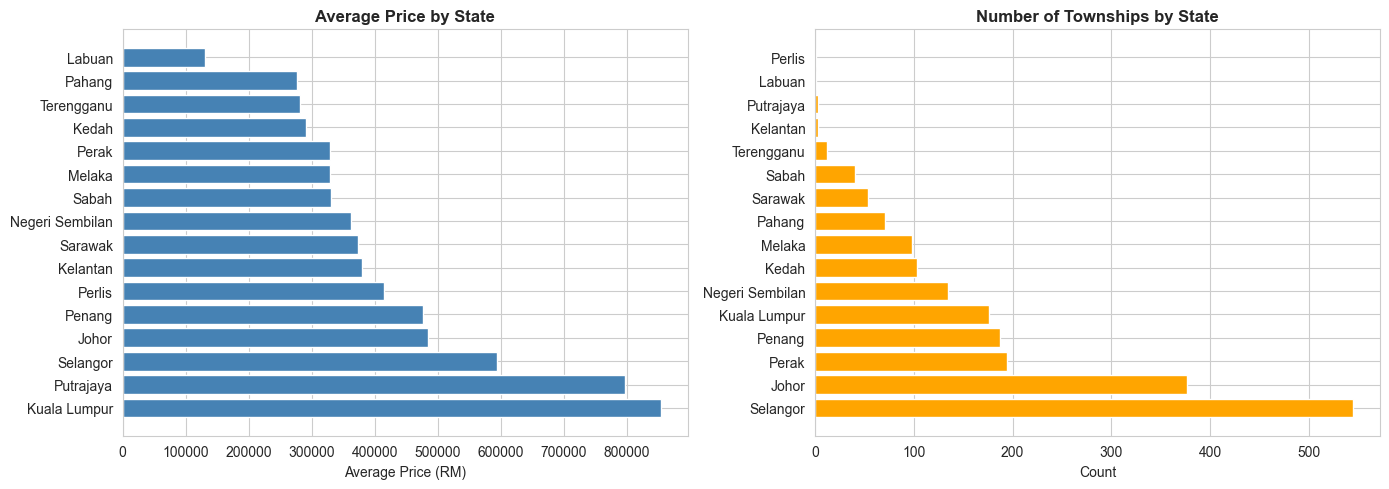

In [ ]:
# Group by state if available
if 'State' in malaysia_data.columns:
    state_stats = malaysia_data.groupby('State')['Median_Price'].agg(['mean', 'median', 'std', 'count'])
    print("Statistics by State:")
    print(state_stats.sort_values('mean', ascending=False))
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Average price by state
    avg_by_state = malaysia_data.groupby('State')['Median_Price'].mean().sort_values(ascending=False)
    axes[0].barh(avg_by_state.index, avg_by_state.values, color='steelblue')
    axes[0].set_title('Average Price by State', fontweight='bold')
    axes[0].set_xlabel('Average Price (RM)')
    
    # Sample count by state
    count_by_state = malaysia_data.groupby('State').size().sort_values(ascending=False)
    axes[1].barh(count_by_state.index, count_by_state.values, color='orange')
    axes[1].set_title('Number of Townships by State', fontweight='bold')
    axes[1].set_xlabel('Count')
    
    plt.tight_layout()
    plt.show()

Average Price by State bar chart clearly identifies Kuala Lumpur and Putrajaya as the most expensive regions, with average prices significantly higher than states like Kelantan or Perlis.

Number of Townships by State: Selangor and Johor have the highest number of townships, indicating they are the most active and developed housing markets in the dataset.

## Price per Sq Ft Analysis


Median_PSF Statistics:
count    2000.000000
mean      328.862500
std       193.281739
min        38.000000
25%       201.000000
50%       293.000000
75%       412.000000
max      3017.000000
Name: Median_PSF, dtype: float64


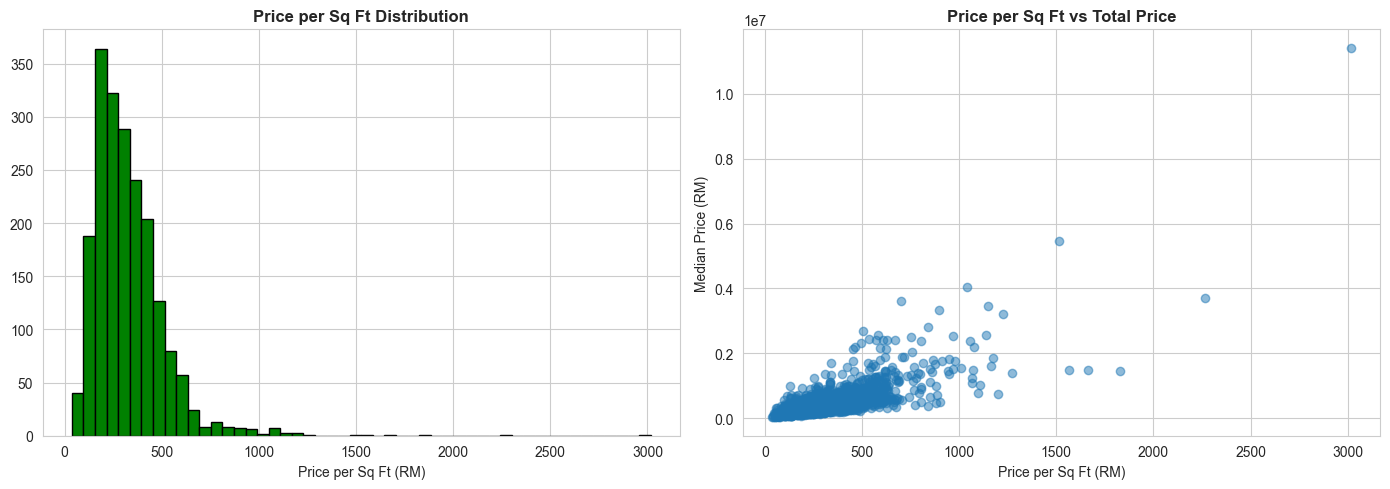

In [26]:
if 'Median_PSF' in malaysia_data.columns:

    print(f"\nMedian_PSF Statistics:")
    print(malaysia_data['Median_PSF'].describe())
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribution
    axes[0].hist(malaysia_data['Median_PSF'].dropna(), bins=50, edgecolor='black', color='green')
    axes[0].set_title('Price per Sq Ft Distribution', fontweight='bold')
    axes[0].set_xlabel('Price per Sq Ft (RM)')
    
    # vs Total Price
    axes[1].scatter(malaysia_data['Median_PSF'], malaysia_data['Median_Price'], alpha=0.5)
    axes[1].set_title('Price per Sq Ft vs Total Price', fontweight='bold')
    axes[1].set_xlabel('Price per Sq Ft (RM)')
    axes[1].set_ylabel('Median Price (RM)')
    
    plt.tight_layout()
    plt.show()

Price per Sq Ft Distribution: most properties cost less than RM 500 per square foot, with very few luxury units exceeding RM 1,000 psf.

Price per Sq Ft vs Total Price: the scatter plot shows a direct upward trend, confirming that higher prices per square foot naturally lead to a higher total property price, although some outliers exist.

## Malaysia Dataset EDA Summary

In [28]:
print("MALAYSIA DATASET - EDA SUMMARY")
print(f"\nTotal Observations: {len(malaysia_data):,}")
print(f"Total Features: {len(malaysia_data.columns)}")
print(f"Numerical: {malaysia_data.select_dtypes(include=[np.number]).shape}")
print(f"Categorical: {malaysia_data.select_dtypes(include=['object']).shape}")
print(f"\nTarget (Median_Price):")
print(f"  Mean: RM {malaysia_data['Median_Price'].mean():,.0f}")
print(f"  Median: RM {malaysia_data['Median_Price'].median():,.0f}")
print(f"  Range: RM {malaysia_data['Median_Price'].min():,.0f} - RM {malaysia_data['Median_Price'].max():,.0f}")
if 'State' in malaysia_data.columns:
    print(f"  Regions: {malaysia_data['State'].nunique()} states")
print(f"Missing Data: {malaysia_data.isnull().sum().sum()} values")


MALAYSIA DATASET - EDA SUMMARY

Total Observations: 2,000
Total Features: 8
Numerical: (2000, 3)
Categorical: (2000, 5)

Target (Median_Price):
  Mean: RM 490,685
  Median: RM 390,000
  Range: RM 27,049 - RM 11,420,500
  Regions: 16 states
Missing Data: 0 values
